<a href="https://colab.research.google.com/github/hiomgupta/ES335-Machine-learning-/blob/main/Pre-requsite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.*

**Ans :** For matrix multiplication of a (n, k) matrix and a (k, m) matrix:

**Multiplications:** You need n\*k\*m multiplications, because each element of the resulting (n, m) matrix requires a dot product of a row from the first matrix and a column from the second matrix, which involves k multiplications.

**Additions:** You need (k-1)\*n\*m additions, since each dot product involves k-1 additions (adding up the k products).

*Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?*

In [40]:
import numpy as np
import time
np.random.seed(52)

In [41]:
#Example matrix-
n, k, m = 100, 50, 30

m1 = np.random.randint(0, 11, size=(n, k))
m2 = np.random.randint(0, 11, size=(k, m))

# result matrix
a = np.zeros((n, m))

t1 = time.time()
for i in range(n):
    for j in range(m):
        for x in range(k):
            a[i][j] += m1[i][x] * m2[x][j]

t2 = time.time()

time_manual = t2 - t1
print(f"Manual matrix multiplication time: {time_manual:.6f} seconds")

t3 = time.time()
b = np.dot(m1, m2)
t4 = time.time()

time_numpy = t4 - t3
print(f"Numpy matrix multiplication time: {time_numpy:.6f} seconds")


if time_manual < time_numpy:
    print("Manual method is faster.")

print("Numpy method is faster, which is expected due to optimized internal implementations.")


Manual matrix multiplication time: 0.184790 seconds
Numpy matrix multiplication time: 0.001034 seconds
Numpy method is faster, which is expected due to optimized internal implementations.


*Q3.Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?*

In [42]:
def find_median_naive(arr):
  n= len(arr)
  for i in range(n/2):
    remaining = arr.copy()
    n1 = len(remaining)
    for _ in range(n1/ 2):
        remaining.remove(max(remaining))
    return max(remaining)

def find_median_sort(arr):
    sorted_arr = sorted(arr)
    n = len(arr)
    mid = n // 2
    return (sorted_arr[mid] + sorted_arr[-mid-1]) / 2 if n % 2 == 0 else sorted_arr[mid]

def find_median_numpy(arr):
    return np.median(arr)

# Example
arr = np.random.randint(0, 100, size=1000)

start = time.time()
median_sort = find_median_sort(arr)
end = time.time()
sort_time = end - start


start = time.time()
median_numpy = find_median_numpy(arr)
end = time.time()
numpy_time = end - start

print(f"Sort method time: {sort_time}, Numpy time: {numpy_time}, Median: {median_sort}")

Sort method time: 0.00042557716369628906, Numpy time: 0.00021767616271972656, Median: 47.0


*Q4. What is the gradient of the following function with respect to x and y?*


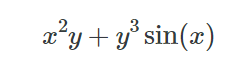

Gradient with respect to x: 2xy + y3*cos(x) Gradient with respect to y: x2 + 3y^2\*sin(x)

*Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y?*

In [43]:
import jax
import jax.numpy as jnp

def func(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

grad_f = jax.grad(lambda xy: func(xy[0], xy[1]))

gradient_at_point = grad_f(jnp.array([1.0, 2.0]))
gradient_at_point


Array([ 8.322418 , 11.0976515], dtype=float32)

*Q6. Use sympy to confirm that you obtain the same gradient analytically.*

In [44]:
import sympy as sp

x, y = sp.symbols('x y')

func = x**2 * y + y**3 * sp.sin(x)

grad_x = sp.diff(func, x)
grad_y = sp.diff(func, y)

print("Gradient with respect to x:", grad_x)
print("Gradient with respect to y:", grad_y)

gradient_at_point = (grad_x.subs({x: 1.0, y: 2.0}), grad_y.subs({x: 1.0, y: 2.0}))

print("\nGradient at point (1, 2):", gradient_at_point)


Gradient with respect to x: 2*x*y + y**3*cos(x)
Gradient with respect to y: x**2 + 3*y**2*sin(x)

Gradient at point (1, 2): (8.32241844694512, 11.0976518176948)


*Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:*

In [45]:
students_dict = {
    2022: {
        "Branch 1": {
            1: {"Name": "N", "Marks": {"Maths": 100, "English": 70}}
        },
        "Branch 2": {}
    },
    2023: {
        "Branch 1": {},
        "Branch 2": {}
    }
}
students_dict

{2022: {'Branch 1': {1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}},
  'Branch 2': {}},
 2023: {'Branch 1': {}, 'Branch 2': {}}}

*Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.*

In [46]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, students=None):
        if students is None:
            students = []
        self.students = students

class Year:
    def __init__(self, branches=None):
        if branches is None:
            branches = {}
        self.branches = branches

class SchoolDatabase:
    def __init__(self, years=None):
        if years is None:
            years = {}
        self.years = years

# Example of filling the database
db = SchoolDatabase({
    2022: Year({
        "Branch 1": Branch([Student(1, "N", {"Maths": 100, "English": 70})])
    })
})

# Iterating through the years in the database
for year in db.years:
    print(year)
    for branch_name, branch in db.years[year].branches.items():
        print(f"  {branch_name}:")
        for student in branch.students:
            print(f"    Roll No: {student.roll_number}, Name: {student.name}, Marks: {student.marks}")


2022
  Branch 1:
    Roll No: 1, Name: N, Marks: {'Maths': 100, 'English': 70}


*Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.*

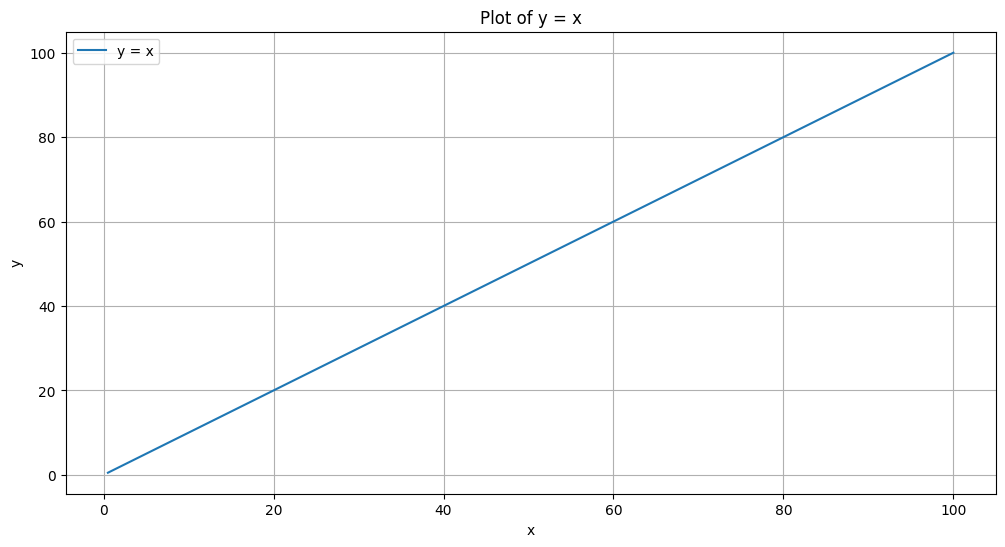

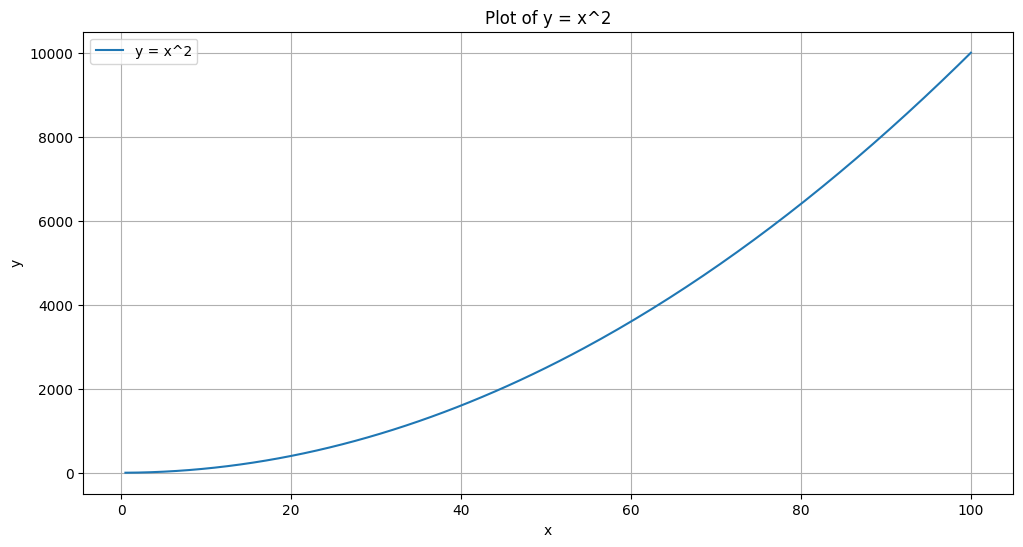

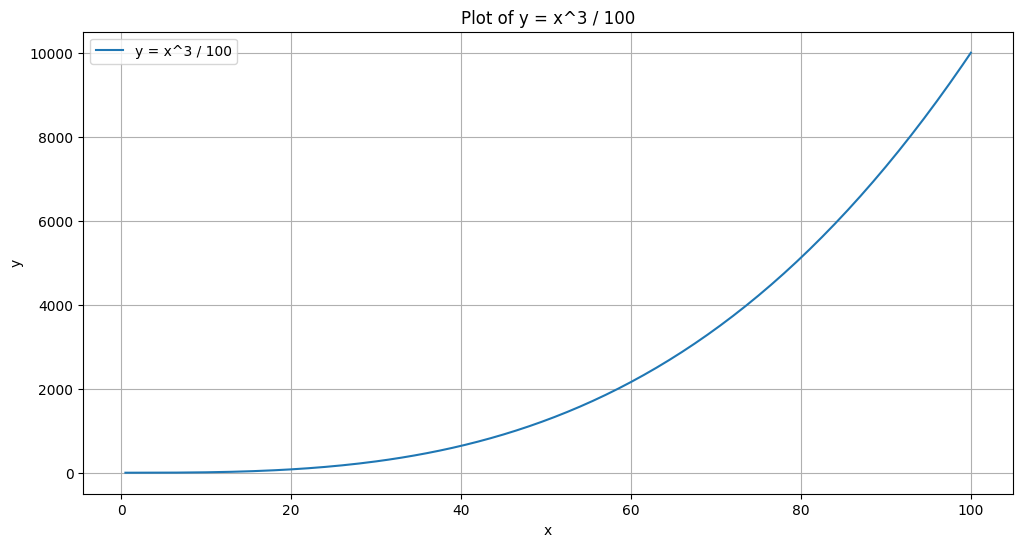

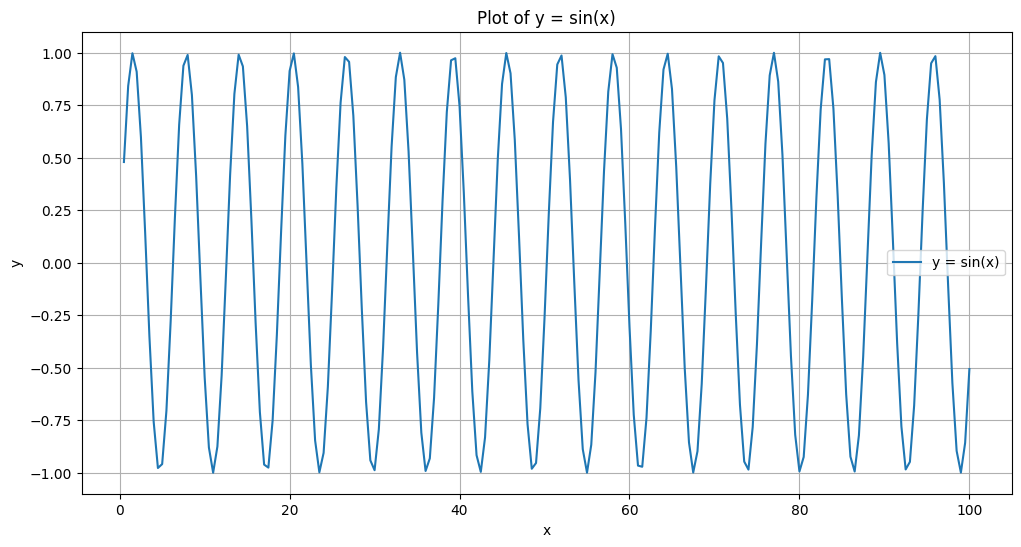

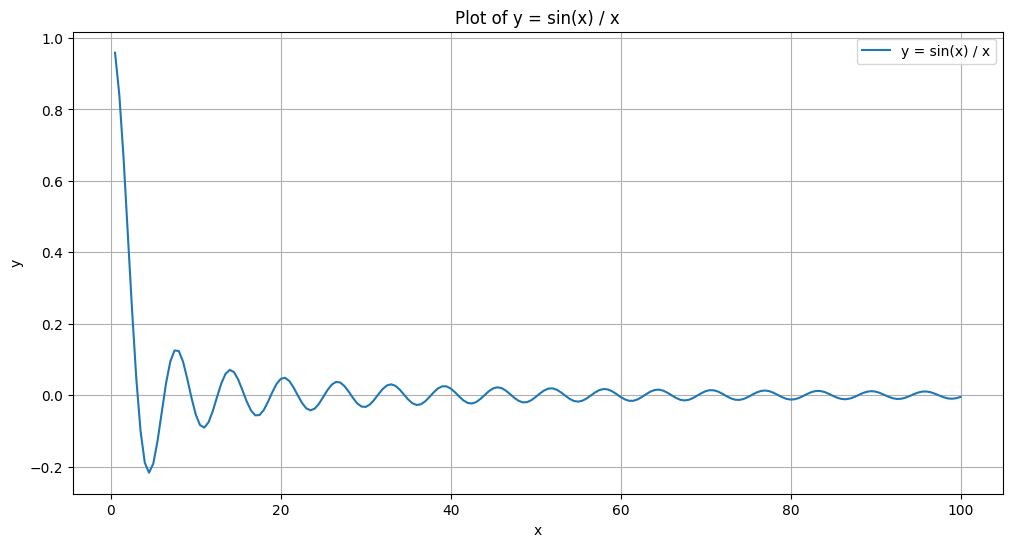

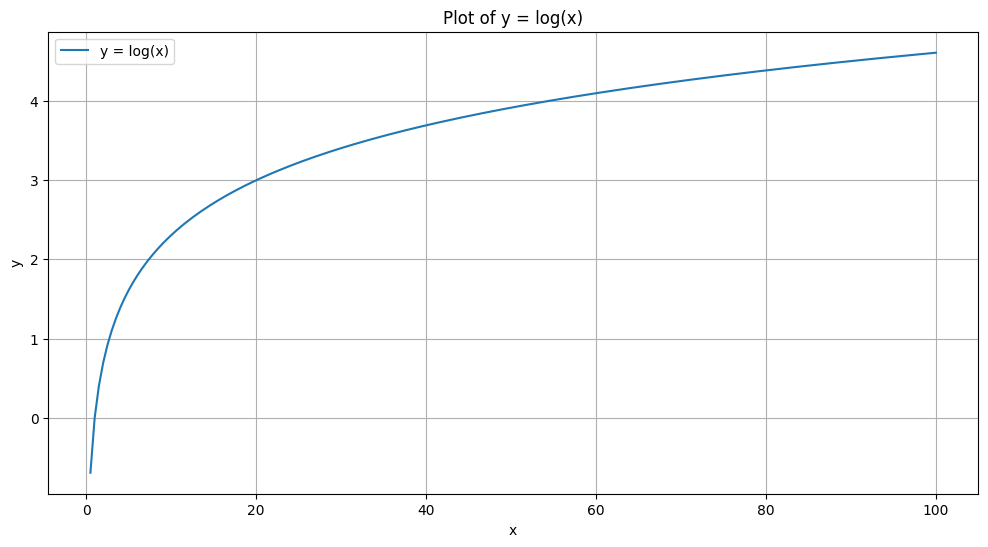

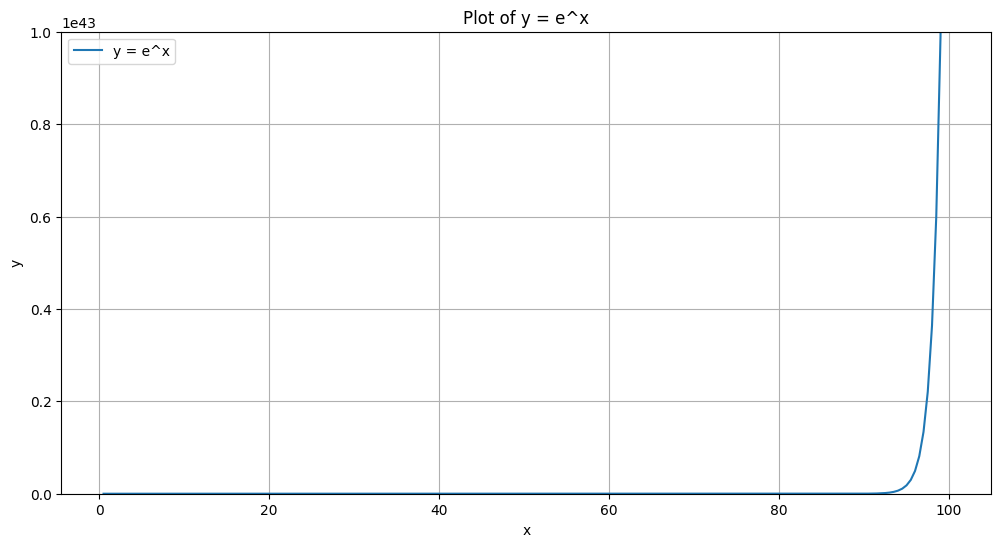

In [47]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

functions = [
    (lambda x: x, 'y = x'),
    (lambda x: x**2, 'y = x^2'),
    (lambda x: x**3 / 100, 'y = x^3 / 100'),
    (lambda x: np.sin(x), 'y = sin(x)'),
    (lambda x: np.sin(x) / x, 'y = sin(x) / x'),
    (lambda x: np.log(x), 'y = log(x)'),
    (lambda x: np.exp(x), 'y = e^x')
]

for func, label in functions:
    y = func(x)

    plt.figure(figsize=(12, 6))
    plt.plot(x, y, label=label)
    plt.title(f'Plot of {label}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()

    if label == 'y = e^x':
        plt.ylim([0, 1e43])  # Adjusted to accommodate larger y-values

    plt.show()


*Q12. Write a small piece of code to explain broadcasting in numpy.*

Ans- The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

In [48]:
import numpy as np

a = np.array([1, 2, 3])

b = np.array([[10],
              [20],
              [30]])

c = a + b

print("Array a:")
print(a)
print("\nArray b:")
print(b)
print("\nResult of a + b (broadcasted):")
print(c)


Array a:
[1 2 3]

Array b:
[[10]
 [20]
 [30]]

Result of a + b (broadcasted):
[[11 12 13]
 [21 22 23]
 [31 32 33]]
